In [1]:
import pandas as pd
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv('/Users/Tanya/Desktop/Learning/DFC/train_GzS76OK/train.csv')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


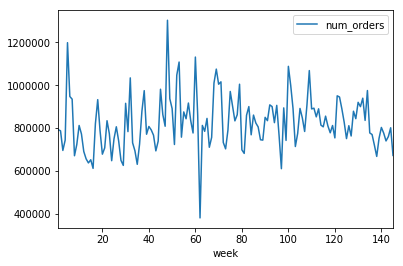

In [3]:
orders = train[['week', 'num_orders']].groupby('week', as_index=False).sum().sort_values(by='week')
orders.plot(x='week', y='num_orders')

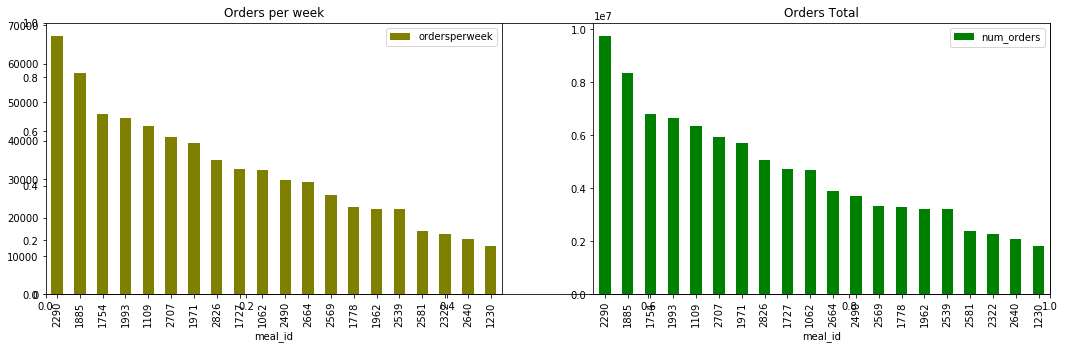

In [4]:
#most popular meals
meals = train[['meal_id', 'num_orders', 'week']].groupby(['meal_id'], as_index=False).agg({'week':'nunique', 
                                                                                           'num_orders':'sum'})
meals['ordersperweek'] = meals.num_orders/meals.week

fig,ax=plt.subplots(figsize=(18,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

meals1=meals.sort_values(by='ordersperweek', ascending=False)[:20]
meals2=meals.sort_values(by='num_orders', ascending=False)[:20]

meals1.plot.bar(x='meal_id', y='ordersperweek', color='olive', ax=ax1, title='Orders per week')

meals2.plot.bar(x='meal_id', y='num_orders', color='green', ax=ax2, title='Orders Total')


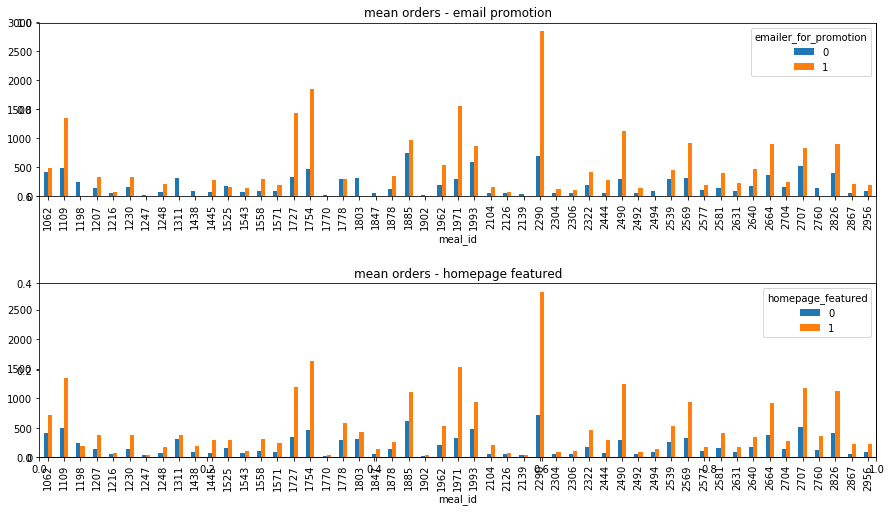

In [6]:
#is promotion a big factor?
train['meal_id'].astype(object)
promo=train[['meal_id', 'emailer_for_promotion', 'checkout_price', 'num_orders']].groupby(['meal_id', 
            'emailer_for_promotion']).mean()

feature=train[['meal_id', 'homepage_featured', 'checkout_price', 'num_orders']].groupby(['meal_id', 
            'homepage_featured']).mean()

fig, ax = plt.subplots(figsize=(15,8))
plt.subplots_adjust(hspace=0.5)
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)



promo.unstack().plot.bar(y = 'num_orders', ax=ax1, title='mean orders - email promotion')
feature.unstack().plot.bar(y='num_orders', ax=ax2, title='mean orders - homepage featured')

plt.show()

